# XCO2 tutorial Outline

XCO2 Tutorial Outline

POWER POINT PORTION

1. Introduction to XCO2

2. What is XCO2 and history

3. What can XCO2 show and not show

4. Plotted example of XCO2

5. Measurement Approach

6. Spatial and Temporal Resolution for OCO-2 and OCO-3

7.How do we know the data is good?

8.Where to download the data

9. Product and Naming

10.Documentation for data products


## JUPYTER NOTEBOOK PORTION

Before following along, you will need to download software packages for this portion of the training. This is also what you will need in order to work with the data. We will be working in python, please make sure to have python 3 installed as well as Jupyter Notebook installed.

Please be sure to have these libraries downloaded as well – (list libraries)

OCO-2 Data files are large so it will take some time to download!

1.	Show what happens when we open up Jupyter Notebook (we will provide a path for the demo)
2.	Show code for how we pull the data from the data (File name, date and geolocation)
3.	Example one – XY Plot of XCO2 variation over time for a given location
4.	Example two- Show same plot but over several years
5.	Example three- Same location and time but shown over Google Earth for OCO-2 data
6.	Example four- Same location and time but show over Google Earth for OCO-3 data
7.	Example five – GIF showing OCO-3 data on spinning globe



# Jupyter notebook installation guide

From the list of website you can follow instructions to setup Jupyter Notebook:
* https://jupyter.org/install
* https://www.geeksforgeeks.org/how-to-install-jupyter-notebook-in-windows/
* https://test-jupyter.readthedocs.io/en/latest/install.html
 

# Libraries (Package Installation Guide)
- Packages can be installed using the requirements.txt file from the directory.
- Type the following command to download packages from the text file:
    * pip install -r requirements.txt

### Dependecies/ Wheel files downloading website
- GDAL, Cartopy, basemap, 
- EG: pip install <b> path to whl file</b> --user
- https://www.lfd.uci.edu/~gohlke/pythonlibs/#basemap

In [1]:
import netCDF4 # packages to open 'netcdf' file
import numpy as np # numpy and pandas packages to pre-process the dataset
import pandas as pd
import matplotlib.pyplot as plt # to create plots and graphs
from mpl_toolkits.basemap import Basemap # to create geo-spatial map, requires dependencies installation
import plotly.express as px

# to grab data from entire year, month
from bs4 import BeautifulSoup # to load webcontent and retrieve data from link

from IPython.display import display, HTML
from IPython import display
from datetime import datetime

from IPython import display
import matplotlib.animation as animation

In [2]:
## Libraries
from urllib import request, parse
# from http.cookiejar import CookieJar
import getpass
import netrc
import os
import requests
# import json
# import pprint
# from osgeo import gdal
# import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import rasterio
#from rasterio.plot import show
import numpy as np
import os
import time
from netCDF4 import Dataset
# from owslib.wms import WebMapService

# pydap library to open session
from pydap import client
from pydap.cas.urs import setup_session
from pydap.client import open_url
%matplotlib inline

## 1. Show what happens when we open up Jupyter Notebook (we will provide a path for the demo) 
### Jupyter Notebook Setup

In [3]:
display.IFrame( src="https://test-jupyter.readthedocs.io/en/latest/install.html",\
              width= 600, height= 500)

# 2. Show code for how we pull the data from the data (File name, date and geolocation)

In [4]:
# display.IFrame( src="https://wiki.earthdata.nasa.gov/display/EDSC/How+To%3A+Download+Data+Using+Earthdata+Search#expand-StageforDelivery",
#                width= 600, height= 500)

## Website for instructions:
- Downloading the data by different options:
https://wiki.earthdata.nasa.gov/display/EDSC/How+To%3A+Download+Data+Using+Earthdata+Search#expand-StageforDelivery

# Extracting File from Earthdata Login

### Earthdata Login Authentication
* An Earthdata Login account is required to access data from NASA EOSDIS. In order to access data from Earthdata website, you will need to create an account in the Earthdata Login UAT environment. 
* Please visit https://uat.urs.earthdata.nasa.gov to set up an account in this test environment. These accounts, as all Earthdata Login accounts, are free to create and only take a moment to set up.
* We need some boilerplate up front to log in to Earthdata Login. The function below will allow Python scripts to log into any Earthdata Login application programmatically. 
* To avoid being prompted for credentials every time you run and also allow clients such as curl to log in, you can add the following to a .netrc (_netrc on Windows) file in your home directory:

#### Option: To pass credentials
1. Create a '.netrc' file in the home directory

* EG: //inside the file to store Earthdata engine source name and login credentials
*****
    machine uat.urs.earthdata.nasa.gov
        login <your username>
        password <your password>
*****
   
* Make sure that this file is only readable by the current user or you will receive an error stating "netrc access too permissive."

$ chmod 0600 ~/.netrc

2. If file '.netrc' not detected then it will prompt login credentials for username and password

In [5]:
def get_session(url, file_name):
    """
    Creating a session with url and filename in openDap for data retrieval
    https://oco2.gesdisc.eosdis.nasa.gov/opendap/
    """
    try:
        login_credentials= 'uat.urs.earthdata.nasa.gov'
        username, _, password = netrc.netrc().authenticators(login_credentials)
    except (FileNotFoundError, TypeError):
        # FileNotFound = There's no .netrc file
        # TypeError = The endpoint isn't in the netrc file, causing the above to try unpacking None
        print('\n*******************************************\n')
        print('Please provide your Earthdata Login credentials to allow data access\n')
        print('Your credentials will only be passed to %s and will not be exposed in Jupyter' % (url))
        print('\n')
        username = input('Username:')
        password = getpass.getpass()
        print('\n*******************************************\n')
        
    # pydap session
    session = setup_session(username, password, check_url= url + file_name)
    
    # using the session to get access the data
    return session

### NOTE:
- Issue with SSL certificate can cause access problem
- Requires changing the settings on anti-virus or firewall

### Date Time formating
- converts the datetime format

In [6]:
def conv_date(d):
    return datetime.strptime(str(d), '%Y%m%d%H%M%S%f')    

### Open netcdf file with session
- NOTE: reformating the date time variable requires (work-in-progress)

In [7]:
def open_netcdf(url, file_name):
    
    # get session from the URL and filename
    session= get_session(url, file_name)
    
    # open the netcdf file and store in dataframe
    pydap_df= open_url(url+file_name, session = session)
    
    # Data preprocessing with new column names from the variables
    # Note: reformating requires for datetime
    
    df_xco2= pd.DataFrame(columns=[ "Latitude", "Longitude", "xco2", "xco2_quality_flag"])
    
    df_xco2["xco2"]= pydap_df["xco2"][:]
    #df_xco2["DateTime"]= pydap_df["date"][:]
    df_xco2["Latitude"]= pydap_df["latitude"][:]
    df_xco2["Longitude"]= pydap_df["longitude"][:]
    df_xco2["xco2_quality_flag"]= pydap_df["xco2_quality_flag"][:]
    
    # Date time
    #Convert soundingID to datetime format
#     df_xco2["DateTime"]= df_xco2["DateTime"].apply(conv_date)
#     df_xco2["DateTime"]= pd.to_datetime(df_xco2["DateTime"])

#     # YEAR and month column
#     df_xco2["Year"]= df_xco2["DateTime"].dt.year
#     df_xco2["Month"]= df_xco2["DateTime"].dt.month
#     df_xco2["Day"]= df_xco2["DateTime"].dt.day
    
    # convert data type
    df_xco2= df_xco2.astype(float)
    
    return df_xco2.round(3)

## Identify a data collection of interest
- In this example, the data sources for downloading the OCO2 and OCO3 data have different sources:
* From gesdisc.eosdis:
    https://oco2.gesdisc.eosdis.nasa.gov/data//
* From pydap:
    https://oco2.gesdisc.eosdis.nasa.gov/opendap/
    
### FORMAT strucutre of the file
#### OCO2 data downloads from geodisc

* Data sources: Using the following optional website to get the data
* https://oco2.gesdisc.eosdis.nasa.gov/data//
* (openDap)https://oco2.gesdisc.eosdis.nasa.gov/

* platform/Instrument:
    - OCO2_DATA/
    
* Level:
    - OCO2_L2_Lite_FP.10r
    
* Year:
    - /2020

* Filename:
    - oco2_LtCO2_200109_B10206Ar_200728203551s.nc4


### Example: Read the file from the OpenDap Source
- Testing with single file from Opendap

In [8]:
url='https://oco2.gesdisc.eosdis.nasa.gov/'
file_name= 'opendap/OCO2_L2_Lite_FP.10r/2020/oco2_LtCO2_200109_B10206Ar_200728203551s.nc4'

In [9]:
%%time
df_xco2= open_netcdf(url, file_name)


*******************************************

Please provide your Earthdata Login credentials to allow data access

Your credentials will only be passed to https://oco2.gesdisc.eosdis.nasa.gov/ and will not be exposed in Jupyter


Username:sagarlimbu
········

*******************************************

CPU times: total: 844 ms
Wall time: 21.4 s


### Display the dataframe

In [10]:
df_xco2.head(3)

,Latitude,Longitude,xco2,xco2_quality_flag
0,-82.680,-120.762,410.116,1.0
1,-82.668,-120.859,409.631,1.0
2,-76.281,-144.006,409.603,1.0


In [11]:
df_xco2.describe()

,Latitude,Longitude,xco2,xco2_quality_flag
count,148936.000000,148936.000000,148936.000000,148936.000000
mean,-9.147371,10.688115,408.962364,0.583768
std,35.216764,91.960067,6.095509,0.492935
min,-84.912000,-179.956000,349.868000,0.000000
25%,-31.587500,-42.790250,408.278000,0.000000
50%,-5.200500,9.955000,409.899500,1.000000
75%,20.863250,80.075250,411.728000,1.000000
max,53.487000,179.929000,440.953000,1.000000


## Visualizing the dataset
### using different libraries

### 1. Plotly

In [12]:
map_token= 'pk.eyJ1Ijoic2FnYXJsaW1idTAiLCJhIjoiY2t2MXhhMm5mNnE5ajJ3dDl2eDZvNTM2NiJ9.1bwmb8HPgFZWwR8kcO5rOA'

### Setting up Token using Map Box
- Create an acount and generate API Key

https://account.mapbox.com/

### Function to visualize the dataset using Plotly

### NOTE: Uncomment the section below to run PLOTLY code. Running the code and using plotly takes large space

In [13]:
# # set mapbox access token
# px.set_mapbox_access_token(map_token)

# fig_second= px.scatter_mapbox(df_xco2,
#                       lat= 'Latitude',
#                       lon= 'Longitude',
#                       color= 'xco2',
#                        zoom= 0,
#                       size_max= 0.25,
# #                       hover_name='DateTime'
#                       )

# # fig_second.update_layout(
# # #mapbox_style="stamen-watercolor"
# # mapbox_style= "white-bg"
# # )

# fig_second.update_layout(
#     autosize=True,
#     hovermode='closest',
#     mapbox=dict(
#         accesstoken=map_token,
#         bearing=0,
#         pitch=0,
#         zoom=0,
#         style="white-bg",
#         layers=[{
#             "below":'traces',
#             "sourcetype": "raster",
#             "sourceattribution": "United States Geological Survey",
#             "source": [
#                 "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
#             ]
#         }
#         ]
#     )
#     ,title='OCO2- XCO2, Atmospheric Carbon Dioxide'

# )

# fig_second.show()

In [14]:
# Example of visualizing the dataset
# plotly_visual(df_xco2)

# Subsetting by geographic bounding box:
- Bounding box coordinates to cover Australia
- Filtering the latitude and longitude by coordinates
- Example filtering the data by Australia region

## Spatial subsetting on the coordinates:
- Latitude(South: North)
- Longitude(West: East)
- Enter the coordinates     
- Example: Subsetting by Australia region
    - latitude: (-45.75 : -9)
    - longitude: (110 : 156)

In [15]:
%%time
def subsetting_coordinates(data, South, North, West, East, zoom = 1, darkmap= 0):
    
    # Filtering the coordinates by region: 
    df_aus_first= data[(data["Latitude"] > South) &(data["Latitude"]< North)]
    df_aus_second= df_aus_first[(df_aus_first["Longitude"] >West) & (df_aus_first["Longitude"] < East)]
    
    # set token
    px.set_mapbox_access_token(map_token)

    fig_second= px.scatter_mapbox(df_aus_second,
                          lat= 'Latitude',
                          lon= 'Longitude',
                          color= 'xco2',
                          zoom= zoom,
                          size_max= 15,
                          )

    if darkmap == 1:
        fig_second.update_layout(
        mapbox_style="dark",
        title='OCO2- XCO2, Atmospheric Carbon Dioxide'

        )
    else:
        fig_second.update_layout(
        mapbox_style="stamen-watercolor",
        title='OCO2- XCO2, Atmospheric Carbon Dioxide'

        )

    fig_second.show()

CPU times: total: 0 ns
Wall time: 0 ns


### Australia coordinates: 

In [16]:
# # latitude: (-45.75 : -9)
# # longitude: (110 : 156)
# subsetting_coordinates(df_xco2, -45.75, -9, 110, 156, zoom= 3)

### California:
- latitude: (32, 42)
- longitude: (-125.22 , -118)

#### option: Dark map option -> 'darkmap' 1

In [17]:
# subsetting_coordinates(df_xco2, 32,  42, -125.22, -118, zoom= 4, darkmap= 1)

## 2. Basemap

### Guide to download BASEMAP package

* basemap:
Plot on map projections (with coastlines and political boundaries) using matplotlib.

This package depends on the support package basemap-data with the basic basemap data assets, and optionally on the support package basemap-data-hires with high-resolution data assets.

1. Follow the main website instructions to download package
    https://matplotlib.org/basemap/users/installing.html
2. Issues with downloading dependencies:
    https://stackoverflow.com/questions/33020202/how-to-install-matplotlibs-basemap

In [18]:
%%time
def global_coverage(data, title):
# coordinate for global coverage
    lats = np.random.randint(-75, 75, size=20)
    lons = np.random.randint(-179, 179, size=20)

    fig = plt.gcf()
    fig.set_size_inches(12, 8)

    m= Basemap(projection='cyl', resolution='c',
                   llcrnrlat= -90, urcrnrlat=90, llcrnrlon= -180, urcrnrlon= 90)

    m.scatter( data['Longitude'], data['Latitude'], c= data['xco2'], 
              cmap= plt.cm.turbo, 
              s=5,
              marker='*')

    m.bluemarble()   # full scale will be overkill
    m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines


    # Customizing the COLORBAR
    cbar= plt.colorbar(orientation= "horizontal",
                      format= "%.0f",
                      extend="both",
                      shrink= 0.45,
                      aspect= 10,
                      pad= 0.04)

    cbar.set_label(label="XCO2 (parts per million)", size= 15)
    cbar.ax.tick_params(labelsize= 15)

    # ADJUSTT the Color Bar by year
    min_xco2= df_xco2["xco2"].min()
    max_xco2= df_xco2["xco2"].max()
    cbar.set_ticks(np.linspace(min_xco2, max_xco2, 5))
    plt.clim(min_xco2, max_xco2)
    plt.title("XCO2- "+ str(title) + " Atmospheric Carbon Dioxide", fontsize= 19)

    plt.show()

CPU times: total: 0 ns
Wall time: 0 ns


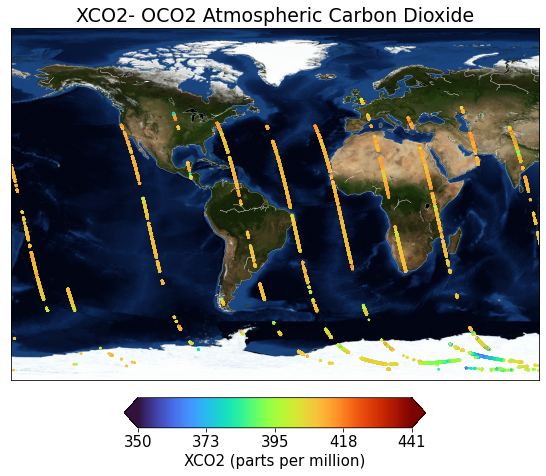

CPU times: total: 9.33 s
Wall time: 9.54 s


In [19]:
%%time
global_coverage(df_xco2, "OCO2")

# Next Steps:

## Retrieving multiple files/data from source
### Web Scraping tool: BeautifulSoup
- Scrapping the web contents allows us to locate the links/sources of the data from from specified webpage
- Getting links for individual files to retrieve data without downloading
- Downloading large files take time and resource

In [20]:
# Questions:
# 4. Example two- Show same plot but over several years
# 5. Example three- Same location and time but shown over Google Earth for OCO-2 data
# 6. Example four- Same location and time but show over Google Earth for OCO-3 data
# 7. Example five – GIF showing OCO-3 data on spinning globe

## 6. Example four- Same location and time but show over Google Earth for OCO-3 data

### OCO3 data retrieval and visualization

In [21]:
# https://oco2.gesdisc.eosdis.nasa.gov/opendap/OCO3_L2_Lite_FP.10.4r/2019/oco3_LtCO2_190806_B10400Br_220317234121s.nc4.xml

In [22]:
url='https://oco2.gesdisc.eosdis.nasa.gov/'
file_name= 'opendap/OCO3_L2_Lite_FP.10.4r/2019/oco3_LtCO2_190806_B10400Br_220317234121s.nc4'

### Call the function to retrieve the data

In [23]:
%%time
df_oco3= open_netcdf(url, file_name)


*******************************************

Please provide your Earthdata Login credentials to allow data access

Your credentials will only be passed to https://oco2.gesdisc.eosdis.nasa.gov/ and will not be exposed in Jupyter


Username:sagarlimbu
········

*******************************************

CPU times: total: 984 ms
Wall time: 22 s


## Display the dataframe

In [24]:
df_oco3.head(4)

,Latitude,Longitude,xco2,xco2_quality_flag
0,-24.968,80.666,409.184,0.0
1,-24.944,80.668,409.792,0.0
2,-24.919,80.670,409.286,1.0
3,-24.895,80.672,410.213,0.0


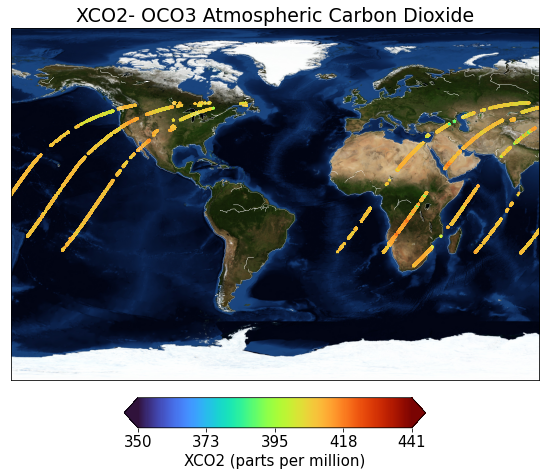

In [25]:
global_coverage(df_oco3, "OCO3")

## 7. Example five – GIF showing OCO-3 data on spinning globe

In [27]:
# %%time
# plt.figure(figsize=(4, 4))

# def decorate_axes(ax):
#     ax.set_global()
#     ax.coastlines()


# def animate(i):
#     lon = i
#     ax = plt.gca()
#     ax.remove()

#     ax = plt.axes([0, 0, 1, 1], projection=ccrs.Orthographic(
#         central_latitude=0, central_longitude=lon))

# #     ax= plt.scatter(x= df_xco2['Longitude'], y=df_xco2['Latitude'],
# #                    c= 'dodgerblue')
#     decorate_axes(ax)

# ani = animation.FuncAnimation(
#     plt.gcf(), animate,
#     frames=np.linspace(0, 360, 90),
#     interval=125, repeat=False)

# #ani.save('poc.gif', writer='imagemagick', dpi=plt.gcf().dpi)

# video = ani.to_html5_video()
# html = display.HTML(video)
# display.display(html)
# plt.close() 
